<a href="https://colab.research.google.com/github/ucfilho/ANN/blob/master/ANN_Rodolfo_dez_04_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Verificação do melhor setup de inicialização da rede neural: número de neuronios, seed e conjunto de dados**

In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import random
%matplotlib inline

In [2]:
!git clone http://github.com/rodolfojbrandao/PhD
%cd PhD

Cloning into 'PhD'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 4283 (delta 10), reused 29 (delta 6), pack-reused 4247
Receiving objects: 100% (4283/4283), 53.85 MiB | 20.67 MiB/s, done.
Resolving deltas: 100% (365/365), done.
Checking out files: 100% (4054/4054), done.
/content/PhD


In [0]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [0]:
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [0]:
def rede(i,j):
    clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5, hidden_layer_sizes=(i),random_state=j)
    return clf

In [0]:
Melhor=1e99
N=20 #i numero de neuronios
M=10 #j
O=10 #k

In [7]:
DAT=pd.read_csv("trabalho01redes2.csv")
print(DAT)

    pressure  temperature  co2        is
0        100           60  0.3  0.043365
1        300           50  0.2  0.068071
2        200           40  0.4  0.072746
3        200           60  0.2  0.061583
4        200           40  0.2  0.047607
5        300           60  0.3  0.100949
6        100           50  0.4  0.055266
7        100           50  0.2  0.026984
8        300           40  0.3  0.070051
9        200           60  0.4  0.133478
10       200           50  0.3  0.087583
11       100           40  0.3  0.021871
12       200           50  0.3  0.083618
13       200           50  0.3  0.071142
14       300           50  0.4  0.121988
15       300           50  0.3  0.056339
16       100           50  0.3  0.035870


In [8]:
for k in range(0,O):
  # leitura dos dados
  DAT=pd.read_csv("trabalho01redes2.csv")

  # separa as colunas de interesse
  Index=[0,1,2,3]
  Dat_Select=[]
  Dat_Select=DAT.iloc[:,Index].copy()
  # separa os dados em normatizados e originais
  DAT_OLD=[]
  DAT_OLD=Dat_Select.copy()
  DAT=Normatiza(Dat_Select)
  
  # separa os dados em treino e teste
  train=[]
  test=[]
  train=DAT.sample(frac=0.85,random_state=k).copy()
  test=DAT.drop(train.index).copy()
  
  # obtem as variaveis independentes (treino e teste)
  x_train=train.iloc[:,[0,1,2]]
  x_test=test.iloc[:,[0,1,2]]
  X_OLD=DAT_OLD.iloc[:,[0,1,2]]

  # obtem as variaveis dependentes (treino e teste)
  Index=[3]
  y_train=train.iloc[:,Index]
  y_test=test.iloc[:,Index]
  Y_OLD=DAT_OLD.iloc[:,Index]
  test=Original(y_test,Y_OLD)
  resist_obs_test=[]
  resist_obs_train=[]
  resist_obs_test=test['is'].copy()
  for i in range(1,N):
      for j in range(0,M):
          col_names=list(y_train)
          clf=rede(i,j)
          clf.fit(x_train, y_train)
          y_calc_train=[]
          y_calc_test=[]
          y_calc_train=clf.predict(x_train)
          y_calc_test=clf.predict(x_test)
          y_calc_train=pd.DataFrame(y_calc_train)
          y_calc_test=pd.DataFrame(y_calc_test)
          y_calc_train.columns = col_names
          y_calc_test.columns = col_names
          y_calc_train=Original(y_calc_train,Y_OLD)
          y_calc_test=Original(y_calc_test,Y_OLD)
          resist_calc_train=[]
          resist_calc_test=[]
          resist_calc_train=y_calc_train['is'].copy()
          resist_calc_test=y_calc_test['is'].copy()
          mse=mean_squared_error(resist_obs_test,resist_calc_test)
          R2_teste=r2_score(resist_obs_test,resist_calc_test)
          if(mse<Melhor):
              Melhor=mse.copy()
              ix=i
              jx=j
              R2r=R2_teste
              seed_sample = k
              resist_obs_train_top=Original(y_train,Y_OLD)
              resist_calc_train_top = resist_calc_train.copy()
              resist_obs_test_top = resist_obs_test.copy()
              resist_calc_test_top = resist_calc_test.copy()

mse=mean_squared_error(resist_obs_train_top,resist_calc_train_top)
R2=r2_score(resist_obs_train_top,resist_calc_train_top)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
print("\n Melhor resposta:")
print("Neuronios=",ix,"Seed=",jx,"Seed_sample",seed_sample,"MSE teste=",Melhor,"R^2 teste=",R2r,"MSE treino=",mse,"R^2 treino=",R2)


 Melhor resposta:
Neuronios= 6 Seed= 3 Seed_sample 6 MSE teste= 8.188055615348696e-05 R^2 teste= 0.9073208059071264 MSE treino= 5.559287844520259e-06 R^2 treino= 0.992240507533352


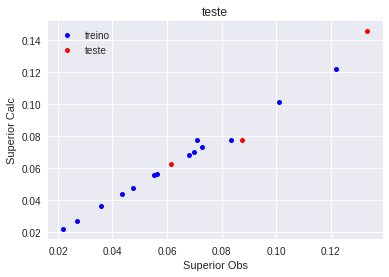

In [10]:
plt.plot(resist_obs_train_top, resist_calc_train_top,  color='green', linestyle='dashed', linewidth = 0, marker='o', markerfacecolor='blue', markersize=5, label='treino') 
plt.ylabel('Superior Calc')
plt.xlabel('Superior Obs')
plt.title('treino')
plt.plot(resist_obs_test_top, resist_calc_test_top,  color='green', linestyle='dashed', linewidth = 0, marker='o', markerfacecolor='red', markersize=5, label='teste') 
plt.legend(loc='upper left')
plt.ylabel('Superior Calc')
plt.xlabel('Superior Obs')
plt.title('teste')
plt.legend()
plt.show()